<a href="https://colab.research.google.com/github/vaidande/SoccerVsRugby-VGG16/blob/main/Soccer_Vs_Rugby_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [3]:
train_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
val_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))

Found 2448 files belonging to 2 classes.
Found 610 files belonging to 2 classes.


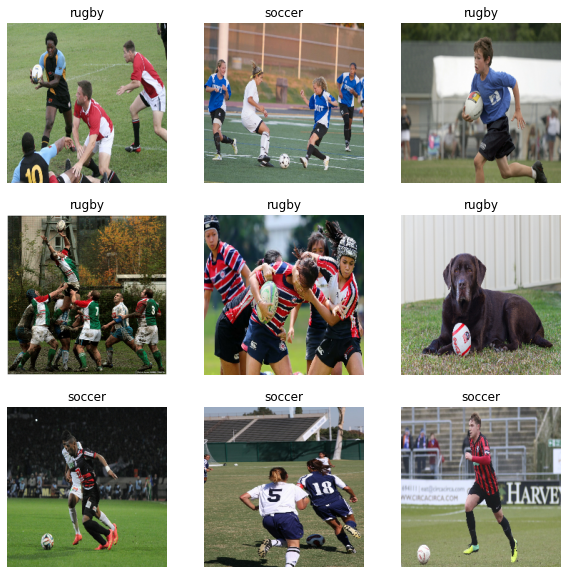

In [5]:
#visualizing some images..
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_dataset = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_dataset = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2448 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [8]:
base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
#freezing model..existing weights and biases will be NOT be trained!
base_model.trainable = False

In [10]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train/*')

In [23]:
x = Flatten()(base_model.output)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_vgg16.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [27]:
initial_epochs = 10
r = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=initial_epochs,
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
77/77 [==============================] - 1250s 16s/step - loss: 0.8365 - accuracy: 0.6720 - val_loss: 0.5028 - val_accuracy: 0.7672

Epoch 00001: val_accuracy improved from -inf to 0.76721, saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_vgg16.h5
Epoch 2/10
77/77 [==============================] - 60s 779ms/step - loss: 0.3972 - accuracy: 0.8277 - val_loss: 0.4884 - val_accuracy: 0.8180

Epoch 00002: val_accuracy improved from 0.76721 to 0.81803, saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_vgg16.h5
Epoch 3/10
77/77 [==============================] - 60s 778ms/step - loss: 0.3238 - accuracy: 0.8551 - val_loss: 0.4708 - val_accuracy: 0.8180

Epoch 00003: val_accuracy did not improve from 0.81803
Epoch 4/10
77/77 [==============================] - 59s 767ms/step - loss: 0.2825 - accuracy: 0.8779 - val_loss: 0.5796 - val_accuracy: 0.7852

Epoch 00004: val_accuracy did not improve from 0.81803
E

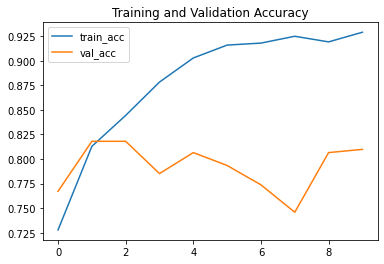

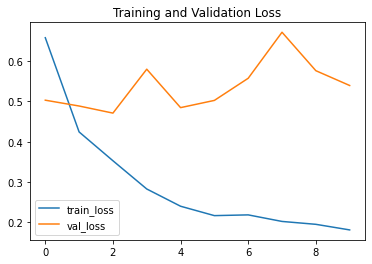

<Figure size 432x288 with 0 Axes>

In [28]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [29]:
#unfreezing base_model..
base_model.trainable = True

In [30]:
#freezing base_model except bottom layers..
for layer in base_model.layers:
  if layer.name == 'block4_conv1':
    break
  layer.trainable = False
  print('Layer '+layer.name+' frozen!')

Layer input_1 frozen!
Layer block1_conv1 frozen!
Layer block1_conv2 frozen!
Layer block1_pool frozen!
Layer block2_conv1 frozen!
Layer block2_conv2 frozen!
Layer block2_pool frozen!
Layer block3_conv1 frozen!
Layer block3_conv2 frozen!
Layer block3_conv3 frozen!
Layer block3_pool frozen!


In [31]:
base_lr = 0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = base_lr/10), metrics=['accuracy'])

In [32]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

r_fine = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=total_epochs,
                        initial_epoch = r.epoch[-1],
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 10/20
77/77 [==============================] - 63s 795ms/step - loss: 1.3891 - accuracy: 0.6638 - val_loss: 0.5972 - val_accuracy: 0.6607

Epoch 00010: val_accuracy did not improve from 0.81803
Epoch 11/20
77/77 [==============================] - 61s 791ms/step - loss: 0.4642 - accuracy: 0.7851 - val_loss: 0.4863 - val_accuracy: 0.7475

Epoch 00011: val_accuracy did not improve from 0.81803
Epoch 12/20
77/77 [==============================] - 61s 791ms/step - loss: 0.3821 - accuracy: 0.8165 - val_loss: 0.4244 - val_accuracy: 0.8066

Epoch 00012: val_accuracy did not improve from 0.81803
Epoch 13/20
77/77 [==============================] - 61s 789ms/step - loss: 0.3926 - accuracy: 0.8235 - val_loss: 0.3806 - val_accuracy: 0.8459

Epoch 00013: val_accuracy improved from 0.81803 to 0.84590, saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_vgg16.h5
Epoch 14/20
77/77 [==============================] - 61s 795ms/step - loss: 0.2935 - accuracy: 0.

In [33]:
acc += r_fine.history['accuracy']
val_acc += r_fine.history['val_accuracy']

loss += r_fine.history['loss']
val_loss += r_fine.history['val_loss']

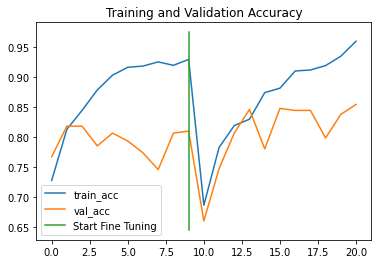

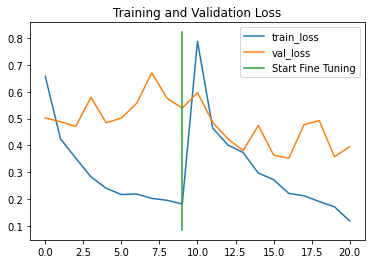

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [35]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_vgg16.h5')

In [72]:
test_image = image.load_img('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test/rugby/rugby.1,319.jpg', target_size=(224,224))
test_image1 = image.load_img('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test/soccer/rugby.1,252.jpg', target_size=(224,224))

In [63]:
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

test_img1 = image.img_to_array(test_image1)
test_img1 = test_img1/255
test_img1 = np.expand_dims(test_img1, axis = 0)
result1 = model.predict(test_img1)

In [64]:
a=np.argmax(result, axis=1)
b=np.argmax(result1, axis=1)

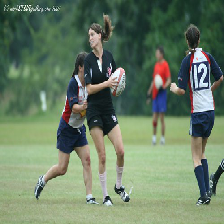

In [66]:
test_image

In [67]:
if a==0:
  print("Its a rugby game!")
else:
  print("Its a soccer game!")

Its a rugby game!


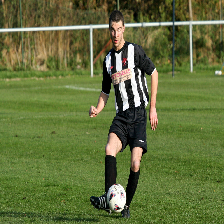

In [73]:
test_image1

In [69]:
if a==0:
  print("Its a rugby game!")
else:
  print("Its a soccer game!")

Its a rugby game!
